In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = np.array([X[i] for i in range(len(X)) if y[i] != 2])
y = np.array([y[i] for i in range(len(y)) if y[i] != 2])
y = y.reshape(-1,1)
X.shape, y.shape

((100, 4), (100, 1))

In [21]:
class MyLogisticRegression:
    import numpy as np
    
    def sigmoid(self,z):
        return 1/(1 + self.np.exp(-z))
                  
    def calculate_loss(self,y,y_hat):
        return -(y*self.np.log(y_hat) + (1-y)*self.np.log(1-y_hat)).mean()
    
    def calculate_gradient(self,X,y,y_hat):
        return self.np.dot(X.T,y_hat-y) / y.size
    
    def predict(self,X,theta):
        y_hat = self.sigmoid(np.dot(X,theta))
        return y_hat
    
    def fit(self,X,y,epochs=100,lr=0.01,batch_size=32,test_size=0.2):
        losses = []
        train_accs = []
        val_accs = []
        batch_losses = []
        weights = self.np.random.rand(X.shape[1]+1,1)
        
        X = self.np.concatenate((self.np.ones((X.shape[0],1)),X),axis=1)
        m = X.shape[0]
        ids = self.np.random.permutation(m)
        
        X = X[ids]
        y = y[ids]
        
        num_of_train = int((1-test_size)*X.shape[0])
        X_train = X[:num_of_train]
        X_val = X[num_of_train:]
        y_train = y[:num_of_train]
        y_val = y[num_of_train:]
        
        
        for _ in range(epochs):
            m = X_train.shape[0]
            ids = self.np.random.permutation(m)
            X_train_shuffled = X_train[ids]
            y_train_shuffled = y_train[ids]
            
            batch_loss = 0
            for i in range(0,m,batch_size):
                
                Xi = X_train_shuffled[i:i+batch_size]
                yi = y_train_shuffled[i:i+batch_size]
                
                y_hat = self.predict(Xi,weights)
                loss = self.calculate_loss(yi,y_hat)
                losses.append(loss)
                batch_loss += loss
                
                gradient = self.calculate_gradient(Xi,yi,y_hat)
                weights -= lr * gradient

                y_train_pred = self.predict(Xi,weights).round()
                train_acc = (y_train_pred == yi).mean()
                train_accs.append(train_acc)

                if test_size > 0:
                    y_val_pred = self.predict(X_val,weights).round()
                    val_acc = (y_val_pred == y_val).mean()
                    val_accs.append(val_acc)
            batch_losses.append(batch_loss.mean())
            
        self.weights = weights
        self.losses = losses
        self.batch_losses = batch_losses
        self.train_accs = train_accs
        self.val_accs = val_accs

0.3446158749781399

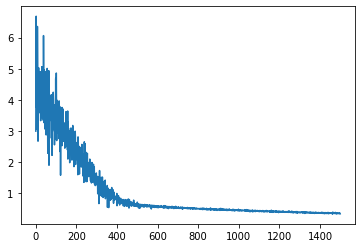

In [22]:
model = MyLogisticRegression()
model.fit(X,y,lr=0.001,batch_size=32,epochs=500)
plt.plot(model.losses)
model.losses[-1]

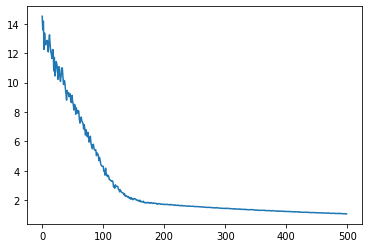

In [23]:
plt.plot(model.batch_losses)

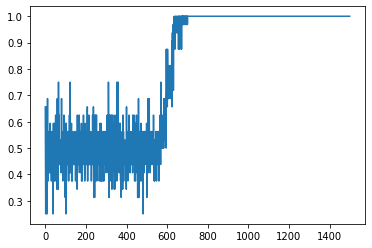

In [24]:
plt.plot(model.train_accs)

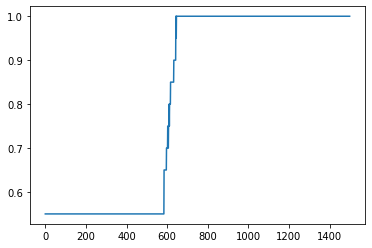

In [25]:
plt.plot(model.val_accs)